# Electric vs Gas Vehicles in San Francisco Neighborhoods.

## 1. Data Wrangle

### A. Import California Vehicle CSV

In [145]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style="whitegrid", font_scale=2)

In [117]:
df = pd.read_csv('vehicle-count-as-of-1-1-2020.csv')

/Users/lanapalmer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
#Visual Check
df.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2020,90001,2007,Gasoline,ACURA,Light,15
1,1/1/2020,90002,2007,Gasoline,ACURA,Light,20
2,1/1/2020,90003,2007,Gasoline,ACURA,Light,29
3,1/1/2020,90004,2007,Gasoline,ACURA,Light,19
4,1/1/2020,90006,2007,Gasoline,ACURA,Light,15


In [119]:
#Visual Check
df.tail()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
602389,1/1/2020,OOS,Unk,Gasoline,Unk,Heavy,98
602390,1/1/2020,90012,Unk,Gasoline,Unk,Light,12
602391,1/1/2020,93065,Unk,Gasoline,Unk,Light,11
602392,1/1/2020,95762,Unk,Gasoline,Unk,Light,12
602393,1/1/2020,OOS,Unk,Gasoline,Unk,Light,52


In [120]:
df.dtypes

Date          object
Zip Code      object
Model Year    object
Fuel          object
Make          object
Duty          object
Vehicles       int64
dtype: object

In [121]:
df['Zip Code'] = df['Zip Code'].astype(str)

In [122]:
df.dtypes

Date          object
Zip Code      object
Model Year    object
Fuel          object
Make          object
Duty          object
Vehicles       int64
dtype: object

In [123]:
df.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

### B. Import SF Zip Codes CSV

In [124]:
zips = pd.read_csv('zipcodesSF.csv')

In [125]:
zips.head()

,Zip Code,Neighborhood,Population (Census 2000)
0,94102,Hayes Valley/Tenderloin/North of Market,"28,991"
1,94103,South of Market,"23,016"
2,94107,Potrero Hill,"17,368"
3,94108,Chinatown,"13,716"
4,94109,Polk/Russian Hill (Nob Hill),"56,322"


In [126]:
zips.dtypes

Zip Code                     int64
Neighborhood                object
Population (Census 2000)    object
dtype: object

In [127]:
zips['Zip Code'] = zips['Zip Code'].astype(str)

In [128]:
zips.dtypes

Zip Code                    object
Neighborhood                object
Population (Census 2000)    object
dtype: object

### C. Create New Dataframe

> Create a dataframe that only includes San Francisco zip codes.

In [129]:
df1 = df[df['Zip Code'].isin(ziplist)]

In [130]:
df1.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
473,1/1/2020,94107,2007,Gasoline,ACURA,Light,16
474,1/1/2020,94109,2007,Gasoline,ACURA,Light,20
475,1/1/2020,94110,2007,Gasoline,ACURA,Light,29
476,1/1/2020,94112,2007,Gasoline,ACURA,Light,63
477,1/1/2020,94114,2007,Gasoline,ACURA,Light,16


In [131]:
df1.shape

(8695, 7)

> I'll now create a dictionary in order to map zip codes in my new dataframe to neighborhood names.

In [132]:
zip_dict = dict(zip(zips['Zip Code'], zips['Neighborhood']))
zip_dict

{'94102': 'Hayes Valley/Tenderloin/North of Market',
 '94103': 'South of Market',
 '94107': 'Potrero Hill',
 '94108': 'Chinatown',
 '94109': 'Polk/Russian Hill (Nob Hill)',
 '94110': 'Inner Mission/Bernal Heights',
 '94112': 'Ingelside-Excelsior/Crocker-Amazon',
 '94114': 'Castro/Noe Valley',
 '94115': 'Western Addition/Japantown',
 '94116': 'Parkside/Forest Hill',
 '94117': 'Haight-Ashbury',
 '94118': 'Inner Richmond',
 '94121': 'Outer Richmond',
 '94122': 'Sunset',
 '94123': 'Marina',
 '94124': 'Bayview-Hunters Point',
 '94127': 'St. Francis Wood/Miraloma/West Portal',
 '94131': 'Twin Peaks-Glen Park',
 '94132': 'Lake Merced',
 '94133': 'North Beach/Chinatown',
 '94134': 'Visitacion Valley/Sunnydale'}

### D. Create New Dataframe

In [137]:
df1['Neighborhood'] = df1['Zip Code'].map(zip_dict)
df1.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Neighborhood
473,1/1/2020,94107,2007,Gasoline,ACURA,Light,16,Potrero Hill
474,1/1/2020,94109,2007,Gasoline,ACURA,Light,20,Polk/Russian Hill (Nob Hill)
475,1/1/2020,94110,2007,Gasoline,ACURA,Light,29,Inner Mission/Bernal Heights
476,1/1/2020,94112,2007,Gasoline,ACURA,Light,63,Ingelside-Excelsior/Crocker-Amazon
477,1/1/2020,94114,2007,Gasoline,ACURA,Light,16,Castro/Noe Valley


In [138]:
df1.tail()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Neighborhood
602045,1/1/2020,94116,Unk,Gasoline,OTHER/UNK,Light,1,Parkside/Forest Hill
602046,1/1/2020,94118,Unk,Gasoline,OTHER/UNK,Light,1,Inner Richmond
602047,1/1/2020,94122,Unk,Gasoline,OTHER/UNK,Light,2,Sunset
602048,1/1/2020,94123,Unk,Gasoline,OTHER/UNK,Light,1,Marina
602049,1/1/2020,94127,Unk,Gasoline,OTHER/UNK,Light,1,St. Francis Wood/Miraloma/West Portal


## 2. Exploratory Data Analysis

While my main question is which neighorhood has the highest percentage of electric cars per capita, other questions are:
* What is the most popular car make in San Francisco?
* What are the overall counts of electric and gasoline vehicles in SF?
* Which neighborhood has the most number of vehicles?
   

### i. Car Make

In [195]:
makes = df1.groupby('Make').agg({'Vehicles': ['sum']})
makes.head()

,Vehicles
,sum
Make,
ACURA,8174
ALFA ROMEO,24
AUDI,11607
AUTOCAR,202
BMW,22261


In [196]:
# rename columns
makes.columns = ['Total']

# reset index to get grouped columns back
makes = makes.reset_index()

#Sort and Reset Index
makes.sort_values(by=['Total'], ascending=False).reset_index(drop=True)

,Make,Total
0,TOYOTA,92923
1,HONDA,54560
2,OTHER/UNK,39015
3,FORD,26661
4,BMW,22261
...,...,...
61,MACK,23
62,STERLING,17
63,LODAL,15
64,KENWORTH,12


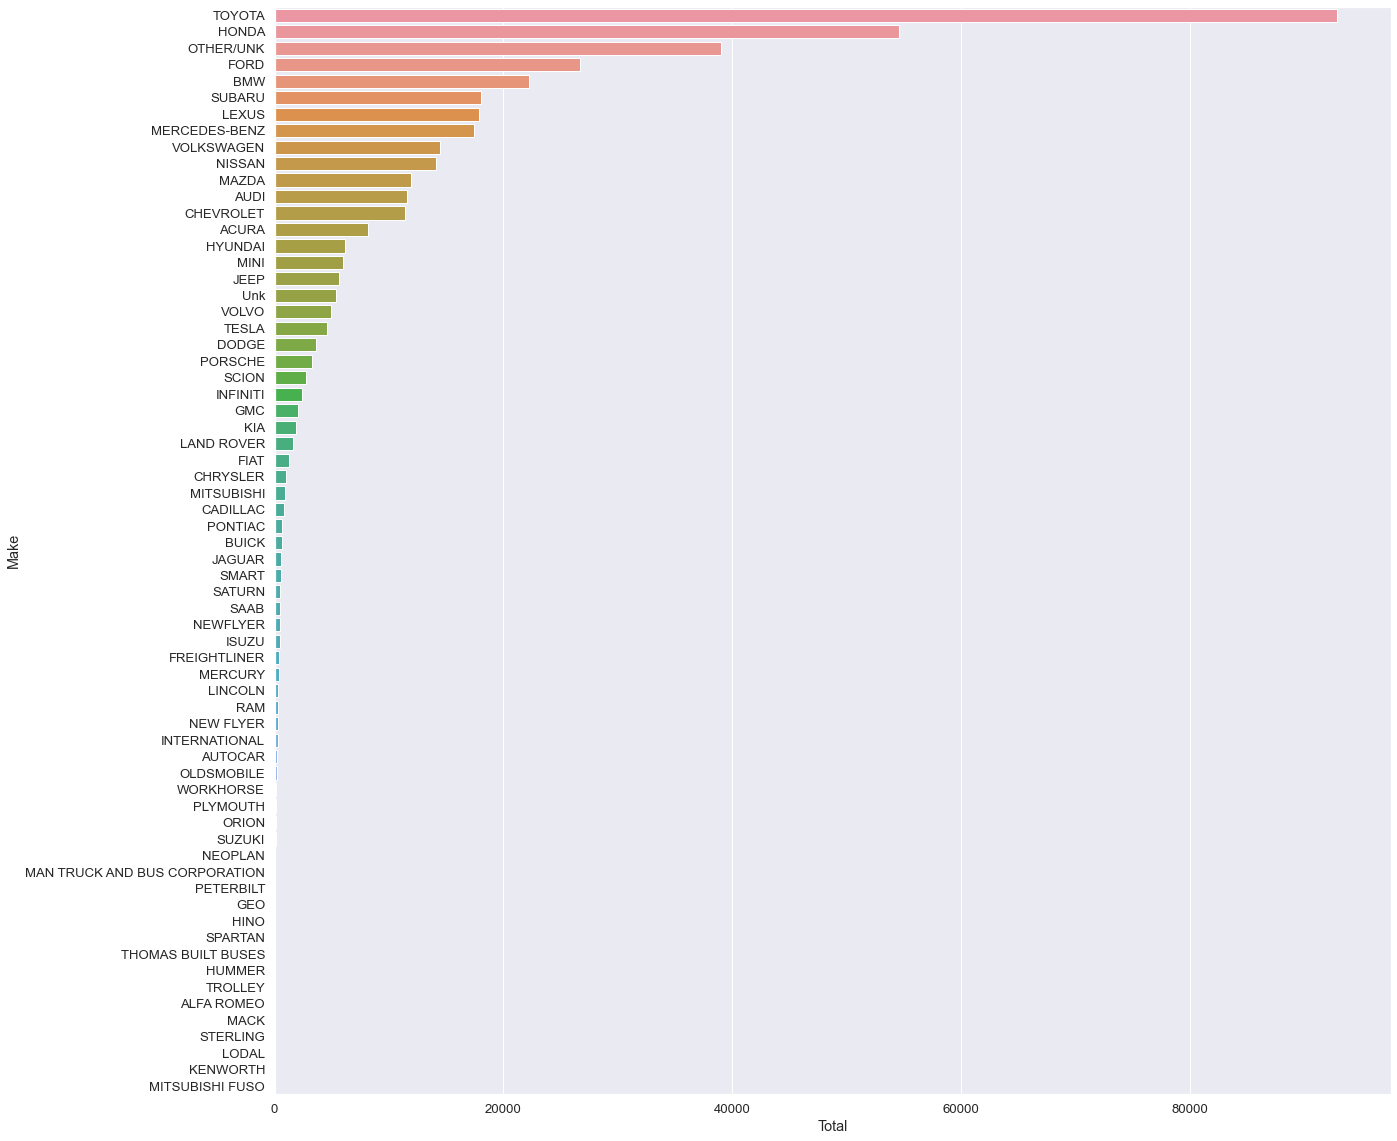

In [207]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.barplot(x="Total", y="Make", data=makes.sort_values("Total", ascending=False))
plt.show();

> Toyota is the clear winner amongst San Franciscans, with Honda in second place.

### ii. Vehicles by Fuel Type

In [218]:
fuel = df1.groupby('Fuel').agg({'Vehicles': ['sum']})
fuel.head()

,Vehicles
,sum
Fuel,
Battery Electric,8269
Diesel and Diesel Hybrid,9246
Flex-Fuel,8551
Gasoline,358821
Hybrid Gasoline,32903


In [209]:
# rename columns
fuel.columns = ['Total']

# reset index to get grouped columns back
fuel = fuel.reset_index()

#Sort and Reset Index
fuel.sort_values(by=['Total'], ascending=False).reset_index(drop=True)

,Fuel,Total
0,Gasoline,358821
1,Hybrid Gasoline,32903
2,Diesel and Diesel Hybrid,9246
3,Flex-Fuel,8551
4,Battery Electric,8269
5,Plug-in Hybrid,4492
6,Natural Gas,376
7,Hydrogen Fuel Cell,97
8,Other,33


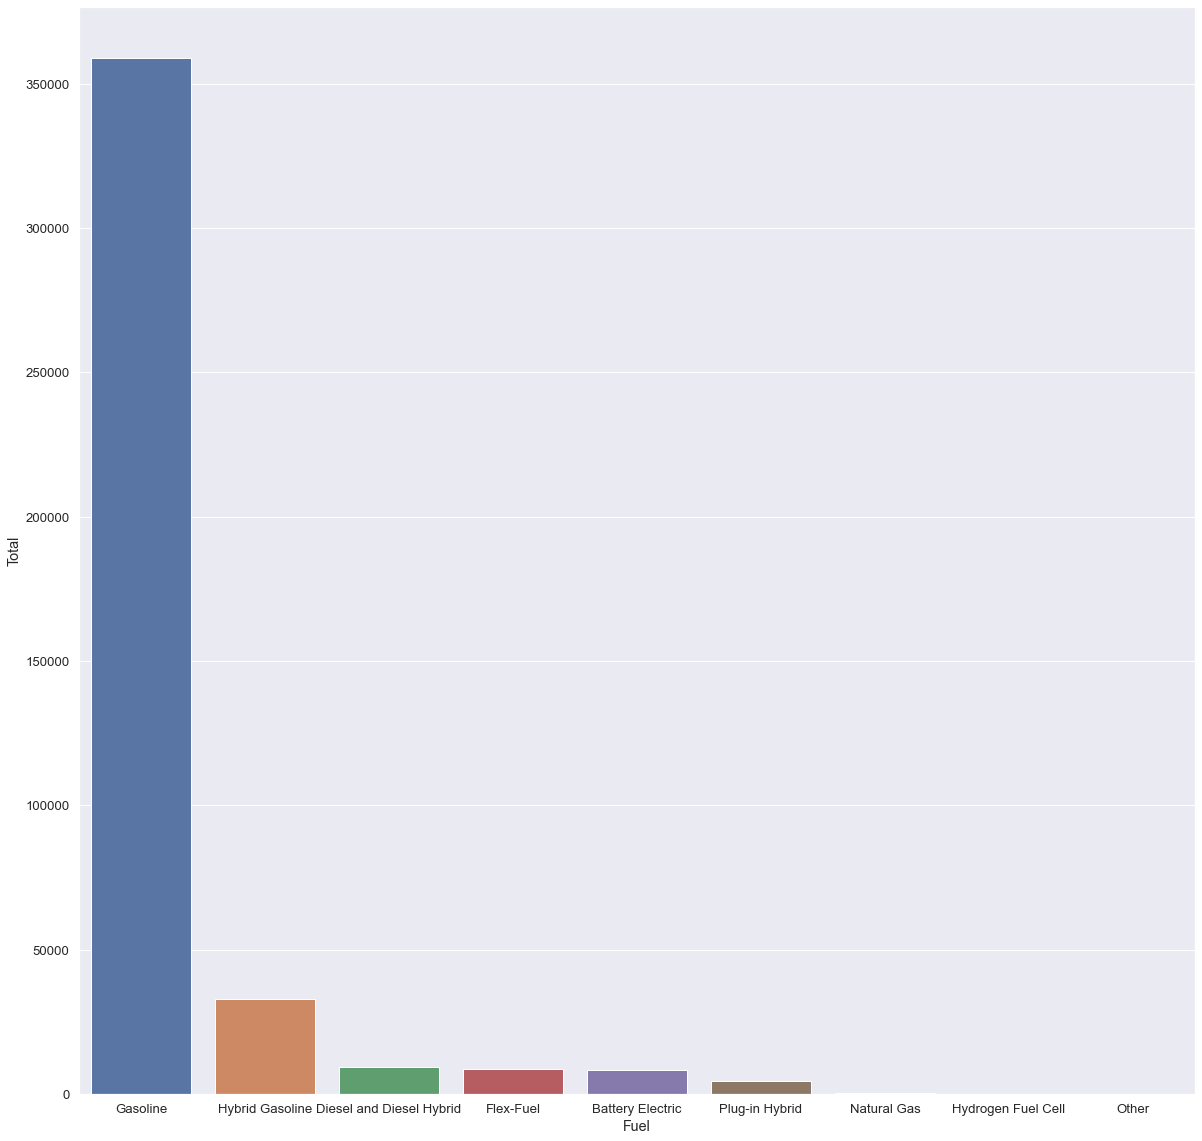

In [211]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.barplot(y="Total", x="Fuel", data=fuel.sort_values("Total", ascending=False))
plt.show();

> Hybrids and electric vehicles are lagging far behind gasoline vehicles.

### iii. Vehicles by Neighborhood

In [212]:
nhood = df1.groupby('Neighborhood').agg({'Vehicles': ['sum']})
nhood.head()

,Vehicles
,sum
Neighborhood,
Bayview-Hunters Point,33874
Castro/Noe Valley,17192
Chinatown,3423
Haight-Ashbury,16848
Hayes Valley/Tenderloin/North of Market,8352


In [213]:
# rename columns
nhood.columns = ['Total']

# reset index to get grouped columns back
nhood = nhood.reset_index()

#Sort and Reset Index
nhood.sort_values(by=['Total'], ascending=False).reset_index(drop=True)

,Neighborhood,Total
0,Ingelside-Excelsior/Crocker-Amazon,47062
1,Bayview-Hunters Point,33874
2,Sunset,32387
3,Inner Mission/Bernal Heights,31969
4,Parkside/Forest Hill,27986
5,Visitacion Valley/Sunnydale,26188
6,Outer Richmond,22765
7,Inner Richmond,20773
8,Polk/Russian Hill (Nob Hill),18621
9,Twin Peaks-Glen Park,17446


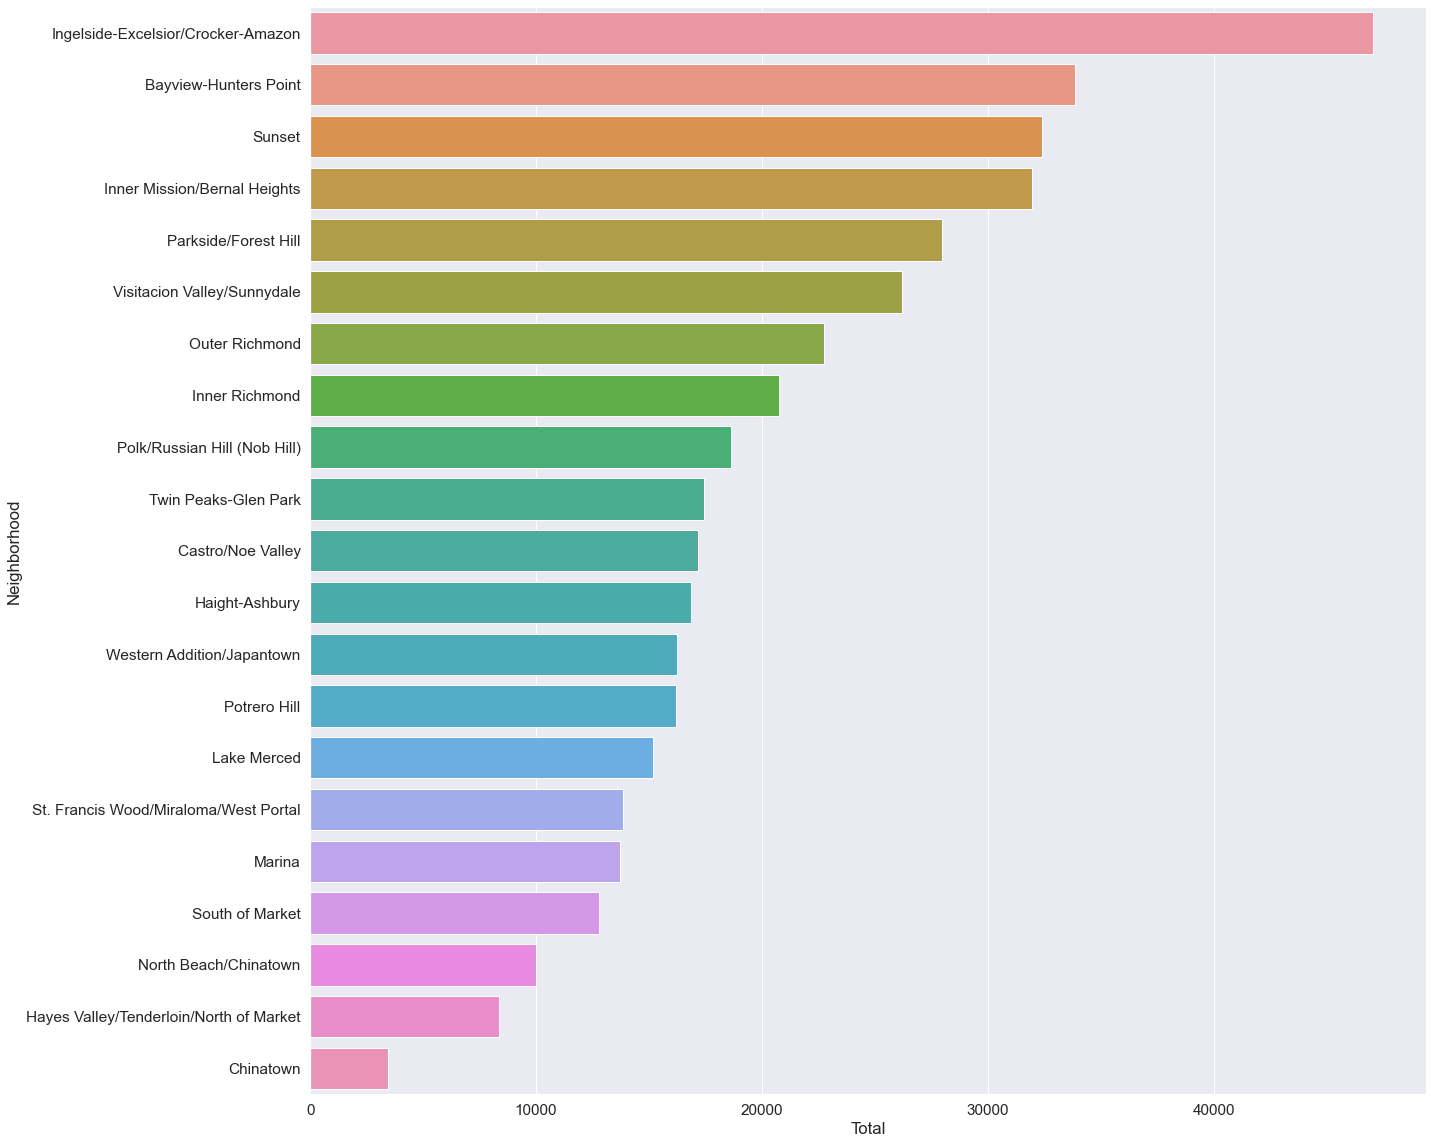

In [217]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.4)
sns.barplot(x="Total", y="Neighborhood", data=nhood.sort_values("Total", ascending=False))
plt.show();

> Ingleside-Excelsior and Bayview/Hunters Point have the most vehicles: These neighborhoods are less accessible by public transit, and tend to be lower income.

> Chinatown has the lowest number of vehicles.

### iv. Electric vs Gas Vehicles by Neighborhood

Finally! I get to answer my initial question: Which SF neighborhood has the most electric vehicles?